In [1]:
using StatGeochem
using DelimitedFiles
using Plots; gr();
using StatsBase

include("../src/parsePerplex.jl")
include("../src/config.jl")
include("../src/seismic.jl")

┌ Info: Recompiling stale cache file /Users/gailin/.julia/compiled/v1.2/StatGeochem/Ht7Cf.ji for StatGeochem [df4de05a-b714-11e8-3c2a-c30fb13e804c]
└ @ Base loading.jl:1240


density_adjust (generic function with 1 method)

In [2]:
dat = parsePerplexData("/users/gailin/resources/perplex-stable/hpha11ver.dat")

Dict{Any,Any} with 237 entries:
  "cup"    => Dict{Any,Any}("EoS"=>8.0,"c1"=>110.3,"m1"=>1.7,"name"=>"cup","b8"…
  "phl"    => Dict{Any,Any}("EoS"=>8.0,"c1"=>770.3,"m1"=>0.849553,"name"=>"phl"…
  "H2S"    => Dict{Any,Any}("EoS"=>1.0,"S0"=>205.77,"c1"=>47.4,"c2"=>0.01024,"n…
  "mcar"   => Dict{Any,Any}("EoS"=>8.0,"c1"=>683.0,"m1"=>0.62,"name"=>"mcar","b…
  "lc"     => Dict{Any,Any}("EoS"=>8.0,"c1"=>369.8,"t3"=>11600.0,"m1"=>4.26,"na…
  "limL"   => Dict{Any,Any}("EoS"=>9.0,"c1"=>99.0,"name"=>"limL","b8"=>10.06,"b…
  "wa"     => Dict{Any,Any}("EoS"=>8.0,"c1"=>499.1,"m1"=>4.26,"name"=>"wa","b8"…
  "br"     => Dict{Any,Any}("EoS"=>8.0,"c1"=>158.4,"m1"=>3.2669,"name"=>"br","b…
  "cl_phl" => Dict{Any,Any}("EoS"=>8.0,"c1"=>573.418,"m1"=>0.849553,"name"=>"cl…
  "gl"     => Dict{Any,Any}("EoS"=>8.0,"c1"=>1717.5,"m1"=>1.10523,"name"=>"gl",…
  "an"     => Dict{Any,Any}("EoS"=>8.0,"c1"=>370.5,"type"=>5.0,"t3"=>42000.0,"m…
  "anl"    => Dict{Any,Any}("EoS"=>8.0,"c1"=>643.5,"m1"=>0.9714,"name"=>"anl"

In [3]:
comps, h = readdlm("../data/kern_dabie_comp.csv", ',', header=true)
h = h[:]
comp_compat = zeros((size(comps,1),length(COMPOSITION_ELEMENTS)))
for (j, name) in enumerate(COMPOSITION_ELEMENTS)
    if name == "H2O_Total"
        name = "H2OC"
    end
    if name == "FeO"
        feoi = findfirst(isequal("FeO"),h)
        fe2o3i = findfirst(isequal("Fe2O3"), h)
        feo = [feoconversion(comps[i, feoi], comps[i, fe2o3i]) for i in 1:size(comps,1)]
        comp_compat[:,j] .= feo
    else
        comp_compat[:, j] .= comps[:,findfirst(isequal(name), h)]
    end
end

In [4]:
sum(comp_compat, dims=2)

30×1 Array{Float64,2}:
 98.81946871066523
 98.75954460914163
 98.42967743147533
 99.64990512690451
 98.95954460914162
 99.09962050761801
 98.38941178680793
 99.34971538071355
 99.33969640609442
 99.5098292284281 
 98.98960153299893
 98.86918409137874
 99.20944973604615
  ⋮               
 98.32967743147532
 99.78979127918991
 98.46937383756975
 99.25954460914161
 99.6699430761427 
 98.2899810253809 
 98.81927896447425
 98.9795825583798 
 99.43988615228541
 99.48960153299893
 99.21946871066524
 97.44629994927575

In [7]:
# General perplex options
perplexdir = "/Users/gailin/resources/perplex-stable/"
scratchdir = "/Users/gailin/dartmouth/crustal_structure/perplexed_pasta/"
solutions = "O(HP)\nOpx(HP)\nOmph(GHP)\nGt(HP)\noAmph(DP)\nGlTrTsPg\nT\nB\nAnth\nChl(HP)"*
    "\nBio(TCC)\nMica(CF)\nCtd(HP)\nIlHm(A)\nSp(HP)\nSapp(HP)\nSt(HP)\nfeldspar"*
    "\nDo(HP)\n"
npoints = 20
fluid_endmembers = "abL\nanL\ndiL\nenL\nfaL\nfliq\nfoL\nkspL\nmliq\nqL\nsiL\nq8L\nfa8L\nfo8L\nsil8L\n"
comp1 = comp_compat[1,:]

### Choose some conditions 
# median depth to 550 isotherm 
isotherm = 39.0;
dpdz = 2900. * 9.8 / 1E5 * 1E3; # km/bar
# sample at half of median depth of crust
#depths = [18.355/2, 18.355, 18.355*(3/2)]
# sample some deep shit 
depths = [18.355, 18.355*2, 18.355*3]
# calc t and p 
tts = (depths ./ 39.0).*550 .+ 273.15 # linear from 0 at surface to 550 at isotherm
pps = depths .* dpdz 
geotherm = 550.0/isotherm/dpdz
P_range = [1, depths[2]*2*dpdz] # to bottom of crust

dataset = "hpha11ver.dat"

"hpha11ver.dat"

In [20]:
println(pps)
println(tts)

[5216.491000000001, 10432.982000000002, 15649.473000000002]
[532.0025641025641, 790.8551282051283, 1049.7076923076922]


In [80]:
perplex_configure_geotherm(perplexdir, scratchdir, comp1, PERPLEX_COMPOSITION_ELTS,
    P_range, 273.15, geotherm, dataset=dataset, solution_phases=solutions,
    excludes=fluid_endmembers, npoints=npoints)

Built problem definition


0

In [81]:
point = perplex_query_point(perplexdir, scratchdir, pps[2])
println(point)


----------------------------------------

Stable phases at:
                             P(bar)   =  10433.0    
                             T(K)     =  790.855    

Phase Compositions (molar  proportions):
                   wt %      vol %     mol %     mol        H2O      CO2      AL2O3    FEO      MGO      CAO      NA2O     K2O      SIO2     TIO2 
 Bio(TCC)          10.56     10.56      5.37    0.229E-01  0.87747  0.00000  0.58529  1.15459  1.63759  0.00000  0.00000  0.50000  2.91471  0.12253
 Mica(CF)          27.22     28.50     16.16    0.688E-01  1.00000  0.00000  1.13897  0.11826  0.24276  0.00000  0.31949  0.18051  3.36103  0.00000
 Do(HP)             0.23      0.23      0.27    0.114E-02  0.00000  2.00000  0.00000  0.48699  0.51301  1.00000  0.00000  0.00000  0.00000  0.00000
 Gt(HP)            17.66     13.67      8.70    0.370E-01  0.00000  0.00000  1.00000  1.49959  0.15833  1.34208  0.00000  0.00000  3.00000  0.00000
 Omph(GHP)         14.07     12.66     14.67    0.62

In [125]:
properties = get_system_props(point)
endmembers = parse_perplex_point(point, true);

SubString{String}["Bio(TCC)", "Mica(CF)", "Do(HP)", "Gt(HP)", "Omph(GHP)", "sph", "ab", "mic", "q"]1, Bio(TCC)
2, Mica(CF)
3, Do(HP)
4, Gt(HP)
5, Omph(GHP)
6, sph
7, ab
8, mic
9, q


In [138]:
targetT = 20+273.15 
targetP = 25 * 10 # MPa to bar 

function get_new_props(perplex, scratch, endmembers, oldP, oldT, targetP, targetT)
    ks = Dict()
    for e in keys(endmembers)
        phase = perplex_query_phase(perplex, scratch, String(e));
        i = searchsortednearest(phase["P(bar)"], oldP)
        ks_p = phase["Ks_{P}"][i]
        ks_t = phase["Ks_{T},bar/K"][i]
        ks_orig = phase["Ks,bar"][i]
        ks[e] = ks_orig + ks_p*(targetP-oldP) + ks_t*(targetT-oldT)
    end 
    
    return vrh(endmembers, ks)
end

get_new_ks(perplexdir, scratchdir, endmembers, pps[2], tts[2], targetP, targetT)

┌ Warning: Perplex seems to be reporting mole fractions instead of weight percentages, attempting to correct
└ @ StatGeochem /Users/gailin/dartmouth/crustal_structure/StatGeochem.jl/src/utilities/Geochemistry.jl:953
┌ Warning: Perplex seems to be reporting mole fractions instead of weight percentages, attempting to correct
└ @ StatGeochem /Users/gailin/dartmouth/crustal_structure/StatGeochem.jl/src/utilities/Geochemistry.jl:953
┌ Warning: Perplex seems to be reporting mole fractions instead of weight percentages, attempting to correct
└ @ StatGeochem /Users/gailin/dartmouth/crustal_structure/StatGeochem.jl/src/utilities/Geochemistry.jl:953
┌ Warning: Perplex seems to be reporting mole fractions instead of weight percentages, attempting to correct
└ @ StatGeochem /Users/gailin/dartmouth/crustal_structure/StatGeochem.jl/src/utilities/Geochemistry.jl:953
┌ Warning: Perplex seems to be reporting mole fractions instead of weight percentages, attempting to correct
└ @ StatGeochem /Users/gail

632338.3833355457

In [85]:
st = SeismicTransform("/users/gailin/resources/perplex-stable/hpha11ver.dat");

In [86]:
get_seismic(st.Tref, st.Pref, properties, endmembers, st)

SeismicError: Error in seismic calc: Did not find endmember tbit

In [111]:
phase = perplex_query_phase(perplexdir, scratchdir, "Gt(HP)");

┌ Warning: Perplex seems to be reporting mole fractions instead of weight percentages, attempting to correct
└ @ StatGeochem /Users/gailin/dartmouth/crustal_structure/StatGeochem.jl/src/utilities/Geochemistry.jl:953


[5216.491000000001, 10432.982000000002, 15649.473000000002]
Any["vs_{P}", "T(K)", "nom_ox", "vs_{T}", "SIO2", "n,mol", "mu[MGO],J/mol", "V,J/bar/mol", "mu[K2O],J/mol", "mu[AL2O3],J/mo", "CO2", "vol_pct", "mu[TIO2],J/mol", "Gs_P", "mu[SIO2],J/mol", "S,J/K/mol", "wt_pct", "N,g", "alpha,1/K", "TIO2", "cp/cv", "vp_P", "MGO", "mu[NA2O],J/mol", "v0_{P}", "mu[CO2],J/mol", "Gs_{T},bar/K", "mu[FEO],J/mol", "mol_pct", "G,J/mol", "Gruneisen_T", "FEO", "NA2O", "v0,km/s", "rho,kg/m3", "v0_{T}", "AL2O3", "Ks_{P}", "vp_{T}", "CAO", "Ks,bar", "H2O", "beta,1/bar", "mu[H2O],J/mol", "elements", "cp,J/K/mol", "H,J/mol", "vp,km/s", "mu[CAO],J/mol", "P(bar)", "Gs,bar", "vs,km/s", "vp/vs", "K2O", "Ks_{T},bar/K"]


┌ Warning: Perplex seems to be reporting mole fractions instead of weight percentages, attempting to correct
└ @ StatGeochem /Users/gailin/dartmouth/crustal_structure/StatGeochem.jl/src/utilities/Geochemistry.jl:953


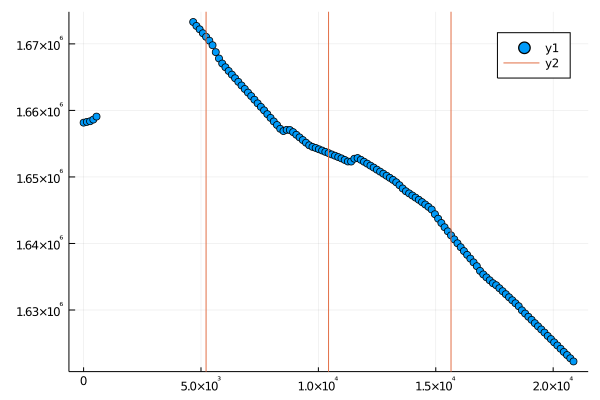

In [114]:
phase = perplex_query_phase(perplexdir, scratchdir, "Gt(HP)");
println(pps)
println(keys(phase))
scatter(phase["P(bar)"], phase["Ks,bar"])
vline!(pps)

In [168]:
dat_ks, header = readdlm("../data/adjustedPerplexResKs.csv", ',', header=true)
dat_no, header = readdlm("../data/adjustedPerplexResNoKs.csv", ',', header=true)

([1.0 600.0 … 6.37 3.55; 1.0 25.0 … 5.8 3.32; … ; 30.0 600.0 … 5.95 3.58; 30.0 600.0 … 5.93 3.58], AbstractString["sample" "P" … "dabie vp" "dabie vs"])

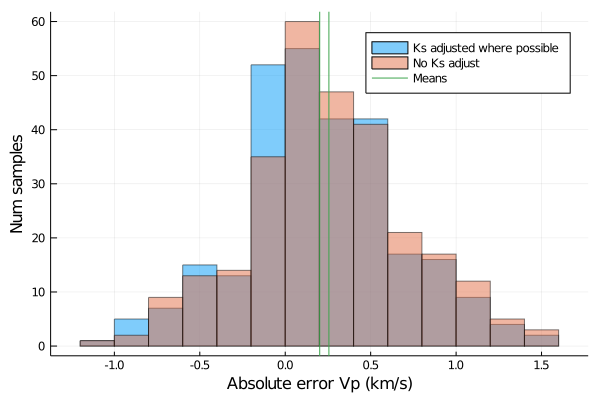

In [178]:
vpdif = dat_ks[.~ isnan.(dat_ks[:,5]),5] .- 
    dat_ks[.~ isnan.(dat_ks[:,5]),8]
histogram(vpdif, alpha=.5, label="Ks adjusted where possible")
vpdifno = dat_no[.~ isnan.(dat_no[:,5]),5] .- 
    dat_no[.~ isnan.(dat_no[:,5]),8]
histogram!(vpdifno, alpha=.5, label="No Ks adjust", xlabel="Absolute error Vp (km/s)", ylabel="Num samples")
vline!([nanmean(vpdifno), nanmean(vpdif)], label="Means")
#savefig("../../present/2_12/with_without_ks.pdf")

In [172]:
println("with ks adjust $(nanmean(vpdif))")
println("without ks adjust $(nanmean(vpdifno))")

with ks adjust 0.20179502698281424
without ks adjust 0.25556405913529084


In [179]:
struct PerplexRunner
    perplex::String
    scratch::String
    dfile::String
    index::Integer 
end 

function PerplexRunner(perplex::String, scratch::String, dfile::String)
    return PerplexRunner(perplex, scratch, dfile, 1)
end

pr = PerplexRunner("/users/gailin/resources/perplex-stable/", 
    "/users/gailin/dartmouth/crustal_structure/perplexed_pasta/", "hpha11ver.dat")

PerplexRunner("/users/gailin/resources/perplex-stable/", "/users/gailin/dartmouth/crustal_structure/perplexed_pasta/", "hpha11ver.dat", 1)

In [180]:
function runSample(pr::PerplexRunner, comp::Array, formationT::Number, formationP::Number, targetT::Array, targetP::Array)
    # Calculate pseudosection
    perplex_configure_pseudosection(pr.perplex, pr.scratch, comp, 
        PERPLEX_COMPOSITION_ELTS, [100, formationP+100], [273.15, formationT+10], 
        dataset=pr.dfile, index=pr.index)

    # Get composition breakdown for formation T and P 

    # Query points in target T and P 
end 

runSample (generic function with 1 method)

In [ ]:
runSample(pr, comp1, tts[2], pps[2], [300, 600], [100, 200])

In [27]:
s = "Stable phases at:\n                             P(bar)   =  5115.60    \n                             T(K)     =  526.996    \n\nPhase Compositions (molar  proportions):\n                   wt %      vol %     mol %     mol        H2O      CO2      AL2O3    FEO      MGO      CAO      NA2O     K2O      SIO2     TIO2 \n Mica(CF)           8.84      8.91      4.32    0.228E-01  1.00000  0.00000  1.34245  0.02040  0.13715  0.00000  0.42122  0.07878  3.15755  0.00000\n Do(HP)             0.45      0.43      0.43    0.227E-02  0.00000  2.00000  0.00000  0.39540  0.60460  1.00000  0.00000  0.00000  0.00000  0.00000\n IlHm(A)            0.57      0.35      0.71    0.375E-02  0.00000  0.00000  0.00000  0.98177  0.01823  0.00000  0.00000  0.00000  0.00000  1.00000\n oAmph(DP)         26.36     23.66      5.66    0.299E-01  1.00000  0.00000  0.14149  3.04545  3.78015  0.01207  0.00694  0.00000  7.86545  0.00000\n GlTrTsPg          11.73     11.15      2.63    0.139E-01  1.00000  0.00000  0.29427  0.84070  3.86069  1.99132  0.00434  0.00000  7.71007  0.00000\n ky                 6.97      5.54      8.10    0.428E-01  0.00000  0.00000  1.00000  0.00000  0.00000  0.00000  0.00000  0.00000  1.00000  0.00000\n ab                14.36     16.00     10.31    0.545E-01  0.00000  0.00000  0.50000  0.00000  0.00000  0.00000  0.50000  0.00000  3.00000  0.00000\n mic               11.47     12.99      7.76    0.410E-01  0.00000  0.00000  0.50000  0.00000  0.00000  0.00000  0.00000  0.50000  3.00000  0.00000\n q                 18.94     20.77     59.36    0.313      0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  1.00000  0.00000\n ru                 0.30      0.21      0.71    0.377E-02  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  1.00000\n\nPhase speciation (molar proportions):\n\n Mica(CF)          cel: 0.13715, fcel: 0.02040, mu: 0.00000, pa: 0.84245\n Do(HP)            dol: 0.60460, ank: 0.39540\n IlHm(A)           ilm: 0.98177, geik: 0.01823\n oAmph(DP)         mpa: 0.00000, ged_dqf: 0.06727, ogl_dqf: 0.00694, tr: 0.00603, anth: -0.04114, fanth_dq: -0.54148, ammo1: 0.67602\n                   ammo2: 0.82635\n GlTrTsPg          tr: 0.68255, ftr: 0.16814, parg: 0.00000, ts: 0.14497, gl: 0.00434\n\nMolar Properties and Density:\n                    N(g)          G(J)     S(J/K)     V(J/bar)      Cp(J/K)       Alpha(1/K)  Beta(1/bar)    Cp/Cv    Density(kg/m3)\n Mica(CF)          385.13       -6028335   503.54       13.327       431.51      0.42934E-04  0.18530E-05   1.0165       2889.8    \n Do(HP)            196.87       -2256410   278.60       6.5179       208.31      0.39051E-04  0.10860E-05   1.0237       3020.5    \n IlHm(A)           151.14       -1285778   171.93       3.1778       118.54      0.28867E-04  0.60858E-06   1.0197       4756.0    \n oAmph(DP)         877.29      -11284557   1087.2       27.034       884.54      0.30321E-04  0.14138E-05   1.0106       3245.1    \n GlTrTsPg          839.21      -12264041   1040.7       27.391       864.75      0.31450E-04  0.13130E-05   1.0127       3063.8    \n ky                162.05       -2624318   166.87       4.4226       168.35      0.24640E-04  0.62956E-06   1.0135       3664.0    \n ab                262.22       -4009731   343.55       10.034       274.10      0.28499E-04  0.18133E-05   1.0087       2613.4    \n mic               278.33       -4048997   348.67       10.821       266.60      0.18628E-04  0.16840E-05   1.0044       2572.1    \n q                  60.08        -924536   71.314       2.2626       60.924      0.42871E-04  0.23936E-05   1.0153       2655.6    \n ru                 79.87        -965489   84.497       1.8882       64.706      0.25864E-04  0.45679E-06   1.0230       4229.7    \n System             99.44       -1445251   122.54       3.4150       101.62      0.32076E-04  0.16945E-05   1.0109       2911.9    \n\nSeismic Properties:\n                 Gruneisen_T      Ks(bar)      Mu(bar)    V0(km/s)     Vp(km/s)     Vs(km/s)   Poisson ratio\n Mica(CF)          0.72738      0.51781E+06  0.30181E+06   4.2331       5.6431       3.2317      0.25598    \n Do(HP)             1.1518      0.94264E+06  0.42859E+06   5.5864       7.0801       3.7669      0.30259    \n IlHm(A)            1.2967      0.16756E+07  0.88478E+06   5.9356       7.7483       4.3132      0.27549    \n oAmph(DP)         0.66243      0.70588E+06  0.40851E+06   4.6639       6.2078       3.5481      0.25743    \n GlTrTsPg          0.76836      0.82179E+06  0.47564E+06   5.1791       6.8937       3.9401      0.25741    \n ky                 1.0421      0.15510E+07  0.82512E+06   6.5061       8.5062       4.7455      0.27406    \n ab                0.58034      0.60860E+06  0.35604E+06   4.8257       6.4384       3.6910      0.25522    \n mic               0.45099      0.59396E+06  0.27927E+06   4.8055       6.1294       3.2951      0.29676    \n q                 0.67531      0.38082E+06  0.45294E+06   3.7868       6.0895       4.1299      0.74143E-01\n ru                 1.6903      0.22396E+07  0.11206E+07   7.2767       9.3954       5.1471      0.28559    \n System            0.66961      0.62130E+06  0.40338E+06   4.6192       6.3093       3.7220      0.23313    \n\nIsochemical Seismic Derivatives:\n                Ks_T(bar/K)  Ks_P  Mu_T(bar/K)  Mu_P  Vphi_T(km/s/K) Vphi_P(km/s/bar) Vp_T(km/s/K)  Vp_P(km/s/bar)  Vs_T(km/s/K)  Vs_P(km/s/bar)\n Mica(CF)           -73.86   4.3495    -51.79   0.9810  -0.21105E-03    0.13856E-04   -0.31706E-03    0.12118E-04   -0.20790E-03    0.22582E-05\n Do(HP)            -139.68   3.7428   -143.88   0.8829  -0.30481E-03    0.80571E-05   -0.63687E-03    0.76587E-05   -0.55873E-03    0.18345E-05\n IlHm(A)           -303.10   8.1858   -170.00   1.7000  -0.45118E-03    0.12693E-04   -0.60697E-03    0.11825E-04   -0.35211E-03    0.28312E-05\n oAmph(DP)         -115.13   5.3676    -81.62   1.3174  -0.30963E-03    0.14436E-04   -0.46174E-03    0.13294E-04   -0.30065E-03    0.32128E-05\n GlTrTsPg           -98.44   3.9725    -72.28   0.9769  -0.22876E-03    0.91175E-05   -0.35279E-03    0.79622E-05   -0.23741E-03    0.14596E-05\n ky                -198.50   5.5539   -131.47   0.8975  -0.33618E-03    0.96010E-05   -0.49485E-03    0.81521E-05   -0.31958E-03    0.10871E-05\n ab                 -62.71   3.9665   -112.09   4.2410  -0.17988E-03    0.11350E-04   -0.53872E-03    0.22753E-04   -0.52839E-03    0.18636E-04\n mic                -45.69   3.9668    -25.18   0.7879  -0.14008E-03    0.12001E-04   -0.19432E-03    0.10751E-04   -0.11789E-03    0.18736E-05\n q                 -140.80   8.1692    -17.55   1.6453  -0.61889E-03    0.36085E-04   -0.37719E-03    0.24754E-04    0.84956E-05    0.25583E-05\n ru                -140.14   4.2357    -21.00   0.7800  -0.13356E-03    0.52190E-05   -0.90052E-04    0.44919E-05    0.18333E-04    0.61580E-06\n System             -94.58   5.1148    -52.57   1.4830  -0.27752E-03    0.15100E-04   -0.34699E-03    0.13956E-04   -0.18283E-03    0.36883E-05\n\nBulk Composition:\n\n              mol        g        wt %     mol/kg\n    H2O       0.067     1.200     1.207     0.670\n    CO2       0.005     0.200     0.201     0.046\n    AL2O3     0.129    13.200    13.274     1.302\n    FEO       0.108     7.740     7.783     1.083\n    MGO       0.171     6.900     6.939     1.722\n    CAO       0.030     1.700     1.710     0.305\n    NA2O      0.037     2.300     2.313     0.373\n    K2O       0.022     2.100     2.112     0.224\n    SIO2      1.057    63.500    63.858    10.628\n    TIO2      0.008     0.600     0.603     0.076\n\nOther Bulk Properties:\n\n Enthalpy (J/kg) = -.138845E+08\n Specific Enthalpy (J/m3) = -.404298E+11\n Entropy (J/K/kg) =  1232.27    \n Specific Entropy (J/K/m3) = 0.358820E+07\n Heat Capacity (J/K/kg) =  1021.88    \n Specific Heat Capacity (J/K/m3) = 0.297558E+07\n\n\nChemical Potentials (J/mol):\n\n      H2O           CO2           AL2O3         FEO           MGO           CAO           NA2O          K2O           SIO2          TIO2 \n    -339048.      -488873.     -0.169978E+07  -314143.      -651258.      -760702.      -772461.      -850994.      -924537.      -965490.    \n\nVariance (c-p+2) =  2\n\n\n"
println(s)

Stable phases at:
                             P(bar)   =  5115.60    
                             T(K)     =  526.996    

Phase Compositions (molar  proportions):
                   wt %      vol %     mol %     mol        H2O      CO2      AL2O3    FEO      MGO      CAO      NA2O     K2O      SIO2     TIO2 
 Mica(CF)           8.84      8.91      4.32    0.228E-01  1.00000  0.00000  1.34245  0.02040  0.13715  0.00000  0.42122  0.07878  3.15755  0.00000
 Do(HP)             0.45      0.43      0.43    0.227E-02  0.00000  2.00000  0.00000  0.39540  0.60460  1.00000  0.00000  0.00000  0.00000  0.00000
 IlHm(A)            0.57      0.35      0.71    0.375E-02  0.00000  0.00000  0.00000  0.98177  0.01823  0.00000  0.00000  0.00000  0.00000  1.00000
 oAmph(DP)         26.36     23.66      5.66    0.299E-01  1.00000  0.00000  0.14149  3.04545  3.78015  0.01207  0.00694  0.00000  7.86545  0.00000
 GlTrTsPg          11.73     11.15      2.63    0.139E-01  1.00000  0.00000  0.29427  0.84070  

In [28]:
println("oAmph(DP)         mpa: 0.00000, ged_dqf: 0.06727, ogl_dqf: 0.00694, tr: 0.00603, anth: -0.04114, fanth_dq: -0.54148, ammo1: 0.67602\n                   ammo2: 0.82635\n")

oAmph(DP)         mpa: 0.00000, ged_dqf: 0.06727, ogl_dqf: 0.00694, tr: 0.00603, anth: -0.04114, fanth_dq: -0.54148, ammo1: 0.67602
                   ammo2: 0.82635



In [72]:
include("../src/crustDistribution.jl")

Main.crustDistribution

In [73]:
crustDistribution.getFormationParams()

(34.59273609420251, 36.45080246015002)

In [77]:
comp = [54.8
49.9
53.9
73.4
60.7
56.5
48.3
71
52.4
48.1
56
39.9
49.3
50
34.7
39.5
64.7
45.4
42.9
68.7
46
65.7
90.7
8.2
47.9
48.4
63.5
61.8
48.1
57.9]

a = repeat(comp, inner=10)
for e in a
    println(e)
end

54.8
54.8
54.8
54.8
54.8
54.8
54.8
54.8
54.8
54.8
49.9
49.9
49.9
49.9
49.9
49.9
49.9
49.9
49.9
49.9
53.9
53.9
53.9
53.9
53.9
53.9
53.9
53.9
53.9
53.9
73.4
73.4
73.4
73.4
73.4
73.4
73.4
73.4
73.4
73.4
60.7
60.7
60.7
60.7
60.7
60.7
60.7
60.7
60.7
60.7
56.5
56.5
56.5
56.5
56.5
56.5
56.5
56.5
56.5
56.5
48.3
48.3
48.3
48.3
48.3
48.3
48.3
48.3
48.3
48.3
71.0
71.0
71.0
71.0
71.0
71.0
71.0
71.0
71.0
71.0
52.4
52.4
52.4
52.4
52.4
52.4
52.4
52.4
52.4
52.4
48.1
48.1
48.1
48.1
48.1
48.1
48.1
48.1
48.1
48.1
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
56.0
39.9
39.9
39.9
39.9
39.9
39.9
39.9
39.9
39.9
39.9
49.3
49.3
49.3
49.3
49.3
49.3
49.3
49.3
49.3
49.3
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
34.7
34.7
34.7
34.7
34.7
34.7
34.7
34.7
34.7
34.7
39.5
39.5
39.5
39.5
39.5
39.5
39.5
39.5
39.5
39.5
64.7
64.7
64.7
64.7
64.7
64.7
64.7
64.7
64.7
64.7
45.4
45.4
45.4
45.4
45.4
45.4
45.4
45.4
45.4
45.4
42.9
42.9
42.9
42.9
42.9
42.9
42.9
42.9
42.9
42.9
68.7
68.7
68.7
68.7
68.7
68.7
68.7
68.7
68.7
68.7


In [2]:
test = ["a" "b" "a";1 2 3]

2×3 Array{Any,2}:
  "a"   "b"   "a"
 1     2     3   

In [4]:
elementify(test, sumduplicates=false)

Dict{String,Union{Float64, Array{String,1}, String}} with 3 entries:
  "elements" => ["a", "b"]
  "b"        => 2.0
  "a"        => 2.0

In [5]:
using Random

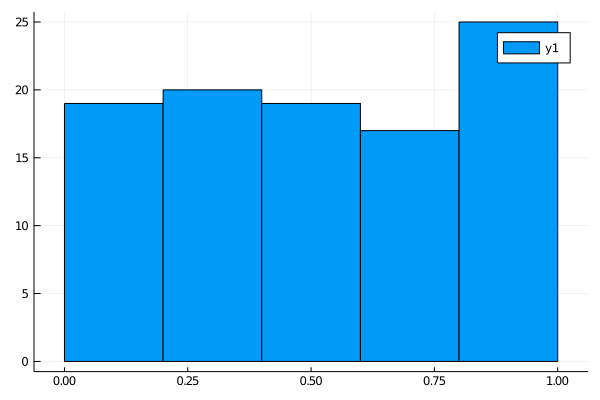